The goal of this notebook is to visualize the ds/dt and phi functions.

TL;DR
- As V increases, phi increases, but still range from 0 to 1. At V = V_th, phi is 0.5, 
- as s increases, ds/dt decreases, and s can crawl up slowly up to s_eq (set ds/dt = 0)
- Changing value of V, which then changes the value of Phi, modulates the rise-vs-drop ratio, but the overall dynamics stated above still stays the same.

# Phi

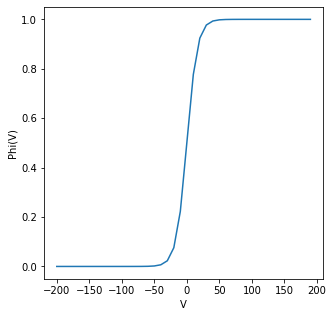

In [24]:
import numpy as np
import pylab as plt

def phi(v):
  B = 0.125
  Vth = 0
  return np.reciprocal(1.0 + np.exp(-B*(v - Vth)))

vs = np.arange(-200, 200, 10)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,5))
ax.set_ylabel("Phi(V)")
ax.set_xlabel("V")
_ = ax.plot(vs, phi(vs))

Okay, the point is Phi ranges from 0 to 1, and increases as V increases.

# S (synapse conductance modulator)

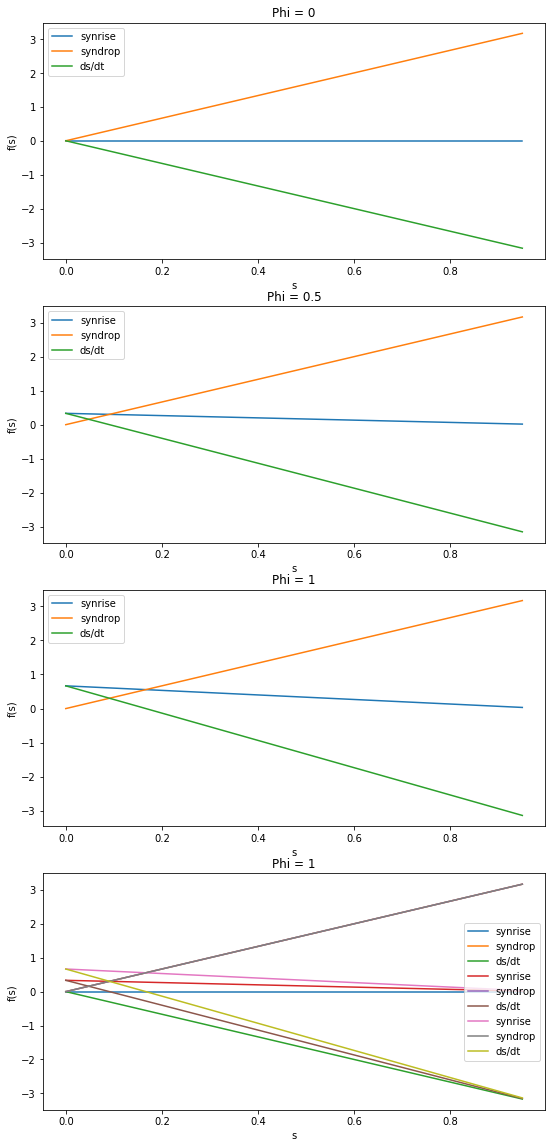

In [27]:
ar = 1.0 / 1.5
ad = 5.0 / 1.5

def synrise(p, s):
  return ar * p * (1 - s)
def syndrop(s):
  return ad * s
def dsdt(p,s):
  return synrise(p,s) - syndrop(s)

s_arr = np.arange(0, 1, 0.05)

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(9,20))

def plot_dsdt(ax, p):
  ax.set_title("Phi = {}".format(p))
  ax.set_ylabel("f(s)")
  ax.set_xlabel("s")
  ax.plot(s_arr, synrise(p, s_arr), label = "synrise")
  ax.plot(s_arr, syndrop(s_arr), label = "syndrop")
  ax.plot(s_arr, dsdt(p, s_arr), label = "ds/dt")
  ax.legend()
  
plot_dsdt(axes[0], 0)
plot_dsdt(axes[1], 0.5)
plot_dsdt(axes[2], 1)
plot_dsdt(axes[3], 0)
plot_dsdt(axes[3], 0.5)
plot_dsdt(axes[3], 1)


So, as s increases, ds/dt decreases. Makes sense, as s increases, we have more syndrop component.